In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
train_df = pd.read_csv('/Users/maheshreddy/Documents/GitHub Destop/PHBS_ML_Project/Housing_Pricing/Data/train.csv')
test_df = pd.read_csv('/Users/maheshreddy/Documents/GitHub Destop/PHBS_ML_Project/Housing_Pricing/Data/test.csv')

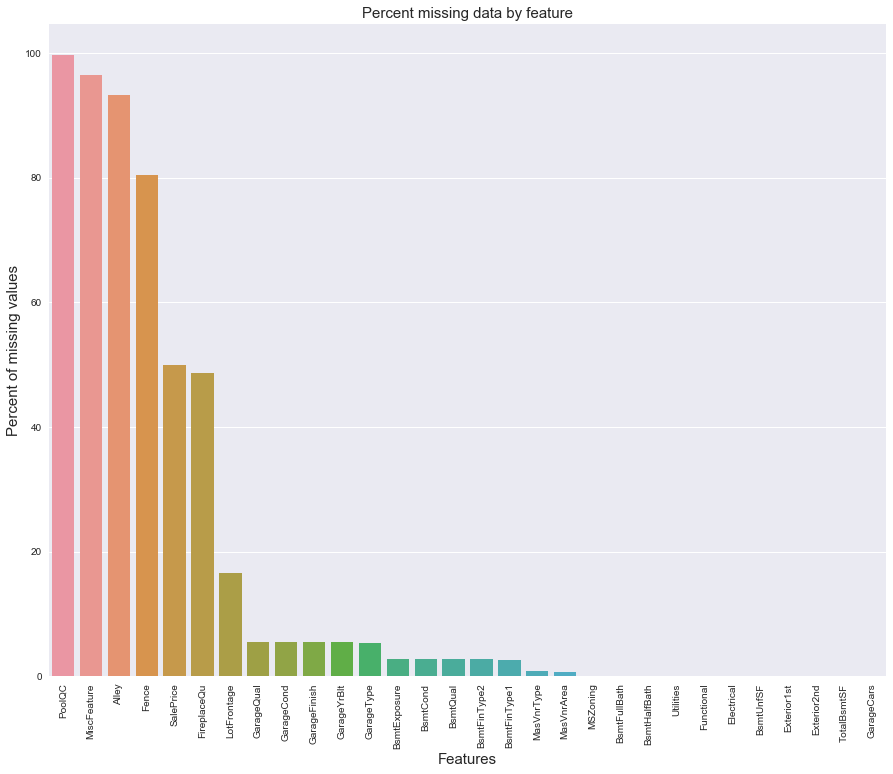

In [3]:
#Missing Data

all_data = pd.concat((train_df, test_df)).reset_index(drop=True)
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [4]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

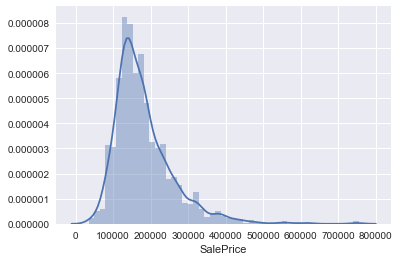

In [6]:
sns.distplot(train_df['SalePrice'])

In [7]:
#Correlation with Sales Price

corr=train_df.corr()["SalePrice"]
corr[np.argsort(corr, axis=0)[::-1]]

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

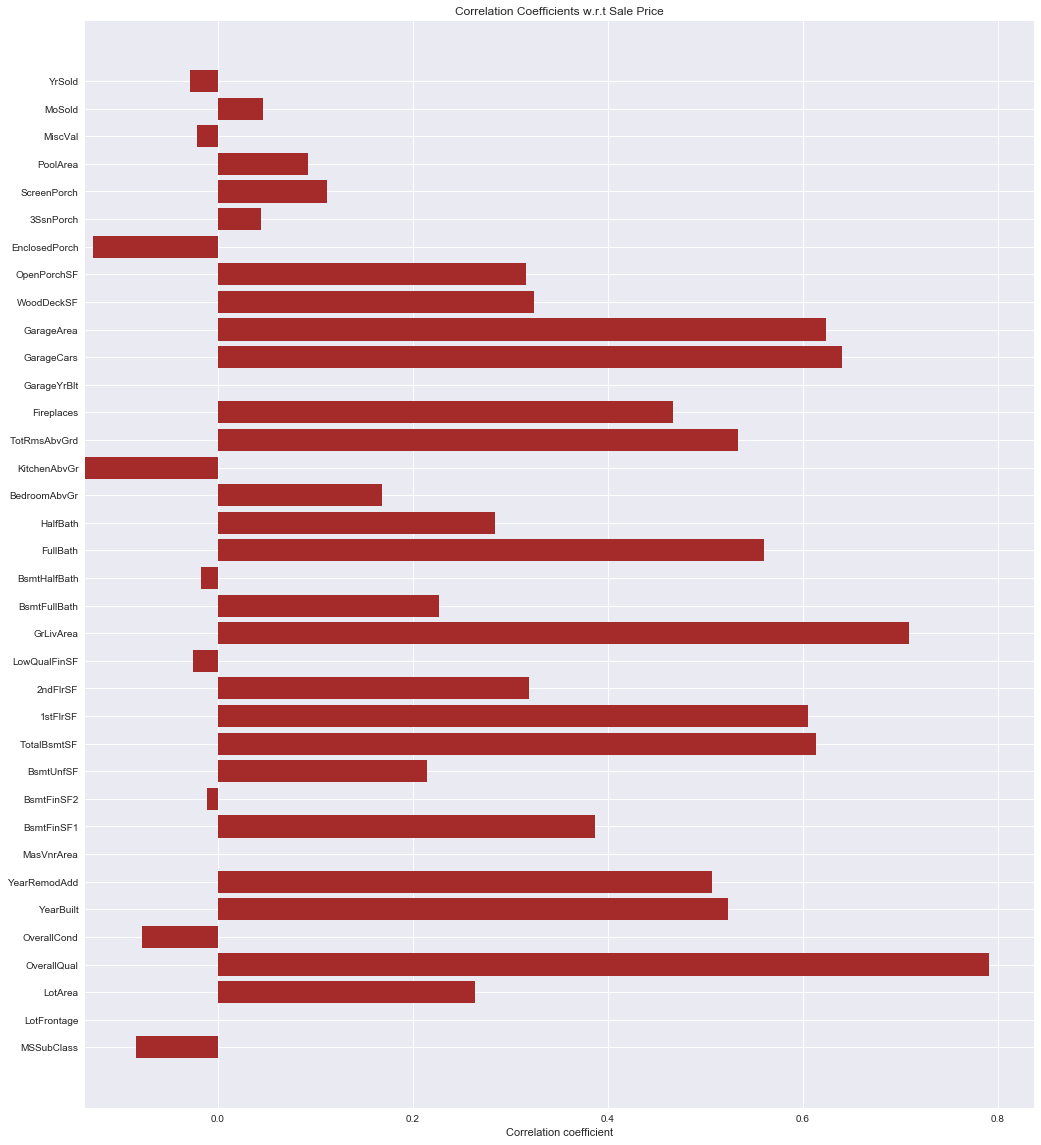

In [8]:
#plotting correlations
num_feat=train_df.columns[train_df.dtypes!=object]
num_feat=num_feat[1:-1] 
labels = []
values = []
for col in num_feat:
    labels.append(col)
    values.append(np.corrcoef(train_df[col].values, train_df.SalePrice.values)[0,1])
    
ind = np.arange(len(labels))
fig, ax = plt.subplots(figsize=(17,20))
rects = ax.barh(ind, np.array(values), color='brown')
ax.set_yticks(ind)
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation Coefficients w.r.t Sale Price");

In [9]:
correlations=train_df.corr()
attrs = correlations.iloc[:-1,:-1] # all except target

threshold = 0.
important_corrs = (attrs[abs(attrs) > threshold][attrs != 1.0]) \
    .unstack().dropna().to_dict()

unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) \
    for key in important_corrs])), 
        columns=['Attribute Pair', 'Correlation'])

    # sorted by absolute value
unique_important_corrs = unique_important_corrs.ix[
    abs(unique_important_corrs['Correlation']).argsort()[::-1]]

unique_important_corrs

,Attribute Pair,Correlation
586,"(GarageArea, GarageCars)",0.882475
189,"(GarageYrBlt, YearBuilt)",0.825667
187,"(GrLivArea, TotRmsAbvGrd)",0.825489
116,"(1stFlrSF, TotalBsmtSF)",0.819530
53,"(2ndFlrSF, GrLivArea)",0.687501
577,"(BedroomAbvGr, TotRmsAbvGrd)",0.676620
434,"(BsmtFinSF1, BsmtFullBath)",0.649212
470,"(GarageYrBlt, YearRemodAdd)",0.642277
527,"(FullBath, GrLivArea)",0.630012
545,"(2ndFlrSF, TotRmsAbvGrd)",0.616423


The above table shows multicollinearity amongst variables. We deal with it by either completely removing the variables or by using PCA which reduces the feature set to a small number of non-collinear features.

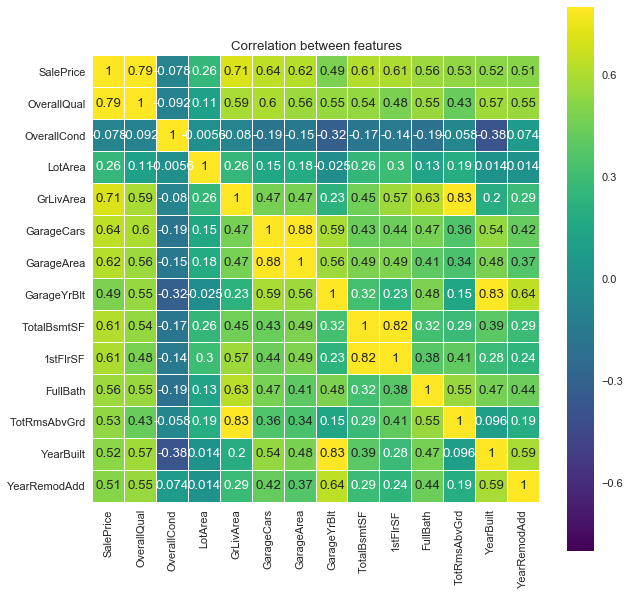

In [10]:
corrMatrix=train_df[["SalePrice","OverallQual","OverallCond","Foundation","LotArea","GrLivArea","GarageCars",
                  "GarageArea","GarageYrBlt","TotalBsmtSF","1stFlrSF","FullBath",
                  "TotRmsAbvGrd","YearBuilt","YearRemodAdd"]].corr()

sns.set(font_scale=1.10)
plt.figure(figsize=(10, 10))

sns.heatmap(corrMatrix, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor="white")
plt.title('Correlation between features');

Let's have a look at the yellow squares. We have to figure out a solution for the multi-collinearity issue before we use the above variables as predictors.

In [11]:
train_df[['OverallQual','SalePrice']].groupby(['OverallQual'],
as_index=False).mean().sort_values(by='OverallQual', ascending=False)

,OverallQual,SalePrice
9,10,438588
8,9,367513
7,8,274735
6,7,207716
5,6,161603
4,5,133523
3,4,108420
2,3,87473
1,2,51770
0,1,50150


In [12]:
train_df[['OverallCond','SalePrice']].groupby(['OverallCond'],
as_index=False).mean().sort_values(by='OverallCond', ascending=False)

,OverallCond,SalePrice
8,9,216004
7,8,155651
6,7,158145
5,6,153961
4,5,203146
3,4,120438
2,3,101929
1,2,141986
0,1,61000


In [13]:
train_df[['ExterQual','SalePrice']].groupby(['ExterQual'],
as_index=False).mean().sort_values(by='SalePrice', ascending=False)

,ExterQual,SalePrice
0,Ex,367360
2,Gd,231633
3,TA,144341
1,Fa,87985


In [14]:
train_df[['BsmtCond','SalePrice']].groupby(['BsmtCond'],
as_index=False).mean().sort_values(by='SalePrice', ascending=False)

,BsmtCond,SalePrice
1,Gd,213599
3,TA,183632
0,Fa,121809
2,Po,64000


In [15]:
train_df[['BsmtQual','SalePrice']].groupby(['BsmtQual'],
as_index=False).mean().sort_values(by='SalePrice', ascending=False)

,BsmtQual,SalePrice
0,Ex,327041
2,Gd,202688
3,TA,140759
1,Fa,115692


In [16]:
train_df[['Fireplaces','SalePrice']].groupby(['Fireplaces'],
as_index=False).mean().sort_values(by='Fireplaces', ascending=False)

,Fireplaces,SalePrice
3,3,252000
2,2,240588
1,1,211843
0,0,141331


In [17]:
train_df[['SaleCondition','SalePrice']].groupby(['SaleCondition'],
as_index=False).mean().sort_values(by='SaleCondition', ascending=False)

,SaleCondition,SalePrice
5,Partial,272291
4,Normal,175202
3,Family,149600
2,Alloca,167377
1,AdjLand,104125
0,Abnorml,146526


# Univariate Analysis

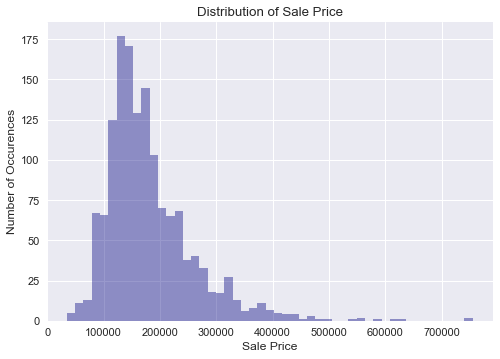

In [18]:
sns.distplot(train_df['SalePrice'], color="navy", kde=False)
plt.title("Distribution of Sale Price")
plt.ylabel("Number of Occurences")
plt.xlabel("Sale Price");

In [19]:
#skewness  

train_df['SalePrice'].skew()

1.8828757597682129

In [20]:
#kurtosis

train_df['SalePrice'].kurt()

6.5362818600645287

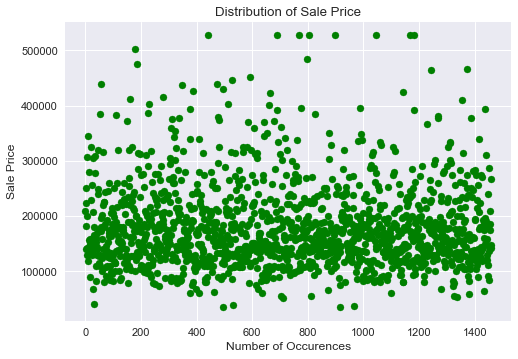

In [21]:
#Dealing with outliers
upperlimit = np.percentile(train_df.SalePrice.values, 99.5)
train_df['SalePrice'].ix[train_df['SalePrice']>upperlimit] = upperlimit

plt.scatter(range(train_df.shape[0]), train_df["SalePrice"].values,color='green')
plt.title("Distribution of Sale Price")
plt.xlabel("Number of Occurences")
plt.ylabel("Sale Price");

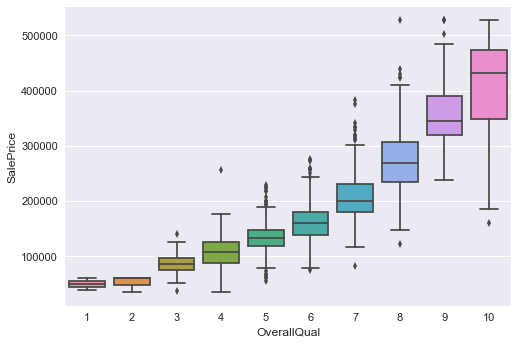

In [22]:
sns.boxplot(x='OverallQual', y="SalePrice", data=train_df)